In [88]:
import pandas as pd
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
from fhhps.estimator import m3, m6
sns.set_context("notebook", font_scale=1.3)
from fhhps.estimator import m6
import numpy as np
%matplotlib inline

# Allcott et al's dataset

In [49]:
df = pd.read_csv(join("..", "empirical", "allcott_data_wide.csv")).sort_index(axis=1)

In [50]:
df.head(3)

,lnK2008,lnK2009,lnK2010,lnW2008,lnW2009,lnW2010,lnY2008,lnY2009,lnY2010
0,10.939970,11.228318,10.920203,10.484884,10.434749,10.641809,12.726221,11.775846,11.317320
1,17.178263,17.177520,17.484970,15.844474,15.921333,16.305950,17.650242,17.330053,17.256460
2,16.859220,16.979128,17.969099,15.037881,15.026399,14.860065,17.156961,17.192630,17.449362


In [51]:
df.describe()

,lnK2008,lnK2009,lnK2010,lnW2008,lnW2009,lnW2010,lnY2008,lnY2009,lnY2010
count,9395.000000,9395.000000,9395.000000,9395.000000,9395.000000,9395.000000,9395.000000,9395.000000,9395.000000
mean,17.446217,17.470075,17.505432,16.220547,16.303228,16.372014,18.065577,18.113176,18.148434
std,2.454717,2.456962,2.453793,1.915288,1.882053,1.895557,2.093842,2.090477,2.136022
min,0.000000,0.000000,1.163071,0.000000,0.000000,0.000000,7.847201,8.971806,6.533789
25%,16.077083,16.118031,16.135897,15.309000,15.356730,15.356193,16.862308,16.909187,16.916132
50%,17.696350,17.731363,17.774370,16.443650,16.516058,16.587645,18.259886,18.302711,18.326277
75%,19.118510,19.123885,19.154607,17.404595,17.476504,17.574155,19.448173,19.469519,19.559560
max,25.295113,25.244490,25.694633,23.216150,22.304588,22.866253,25.142036,25.303509,25.583483


Pairwise distributions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa4cf22978>,
      dtype=object)

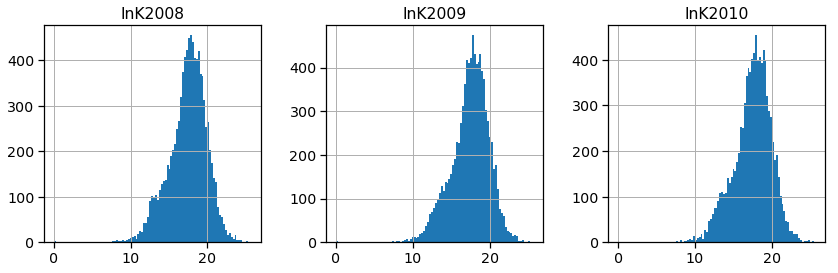

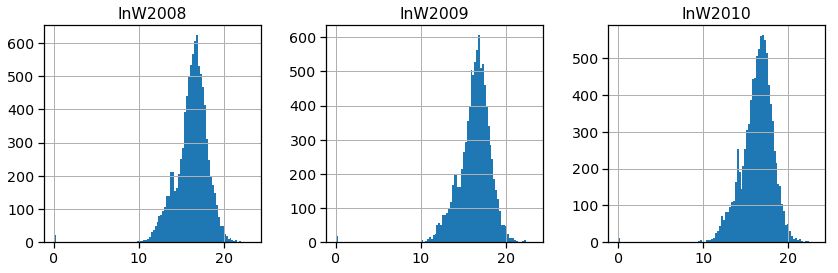

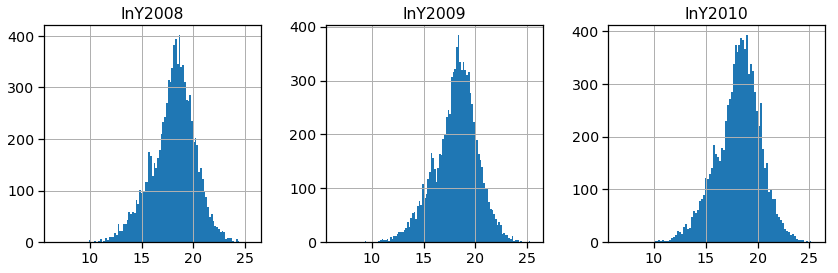

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
df[["lnK2008", "lnK2009", "lnK2010"]].hist(ax=ax, bins=100)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
df[["lnW2008", "lnW2009", "lnW2010"]].hist(ax=ax, bins=100)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
df[["lnY2008", "lnY2009", "lnY2010"]].hist(ax=ax, bins=100)

In [54]:
df.corr()

,lnK2008,lnK2009,lnK2010,lnW2008,lnW2009,lnW2010,lnY2008,lnY2009,lnY2010
lnK2008,1.000000,0.970931,0.958488,0.747847,0.770285,0.782939,0.829461,0.835987,0.818346
lnK2009,0.970931,1.000000,0.972629,0.739709,0.780576,0.791986,0.824141,0.847746,0.829352
lnK2010,0.958488,0.972629,1.000000,0.737435,0.777668,0.802020,0.819324,0.842540,0.839012
lnW2008,0.747847,0.739709,0.737435,1.000000,0.835558,0.835383,0.811170,0.791841,0.777013
lnW2009,0.770285,0.780576,0.777668,0.835558,1.000000,0.887601,0.820590,0.837478,0.820020
lnW2010,0.782939,0.791986,0.802020,0.835383,0.887601,1.000000,0.828887,0.846708,0.857476
lnY2008,0.829461,0.824141,0.819324,0.811170,0.820590,0.828887,1.000000,0.930397,0.907676
lnY2009,0.835987,0.847746,0.842540,0.791841,0.837478,0.846708,0.930397,1.000000,0.937084
lnY2010,0.818346,0.829352,0.839012,0.777013,0.820020,0.857476,0.907676,0.937084,1.000000


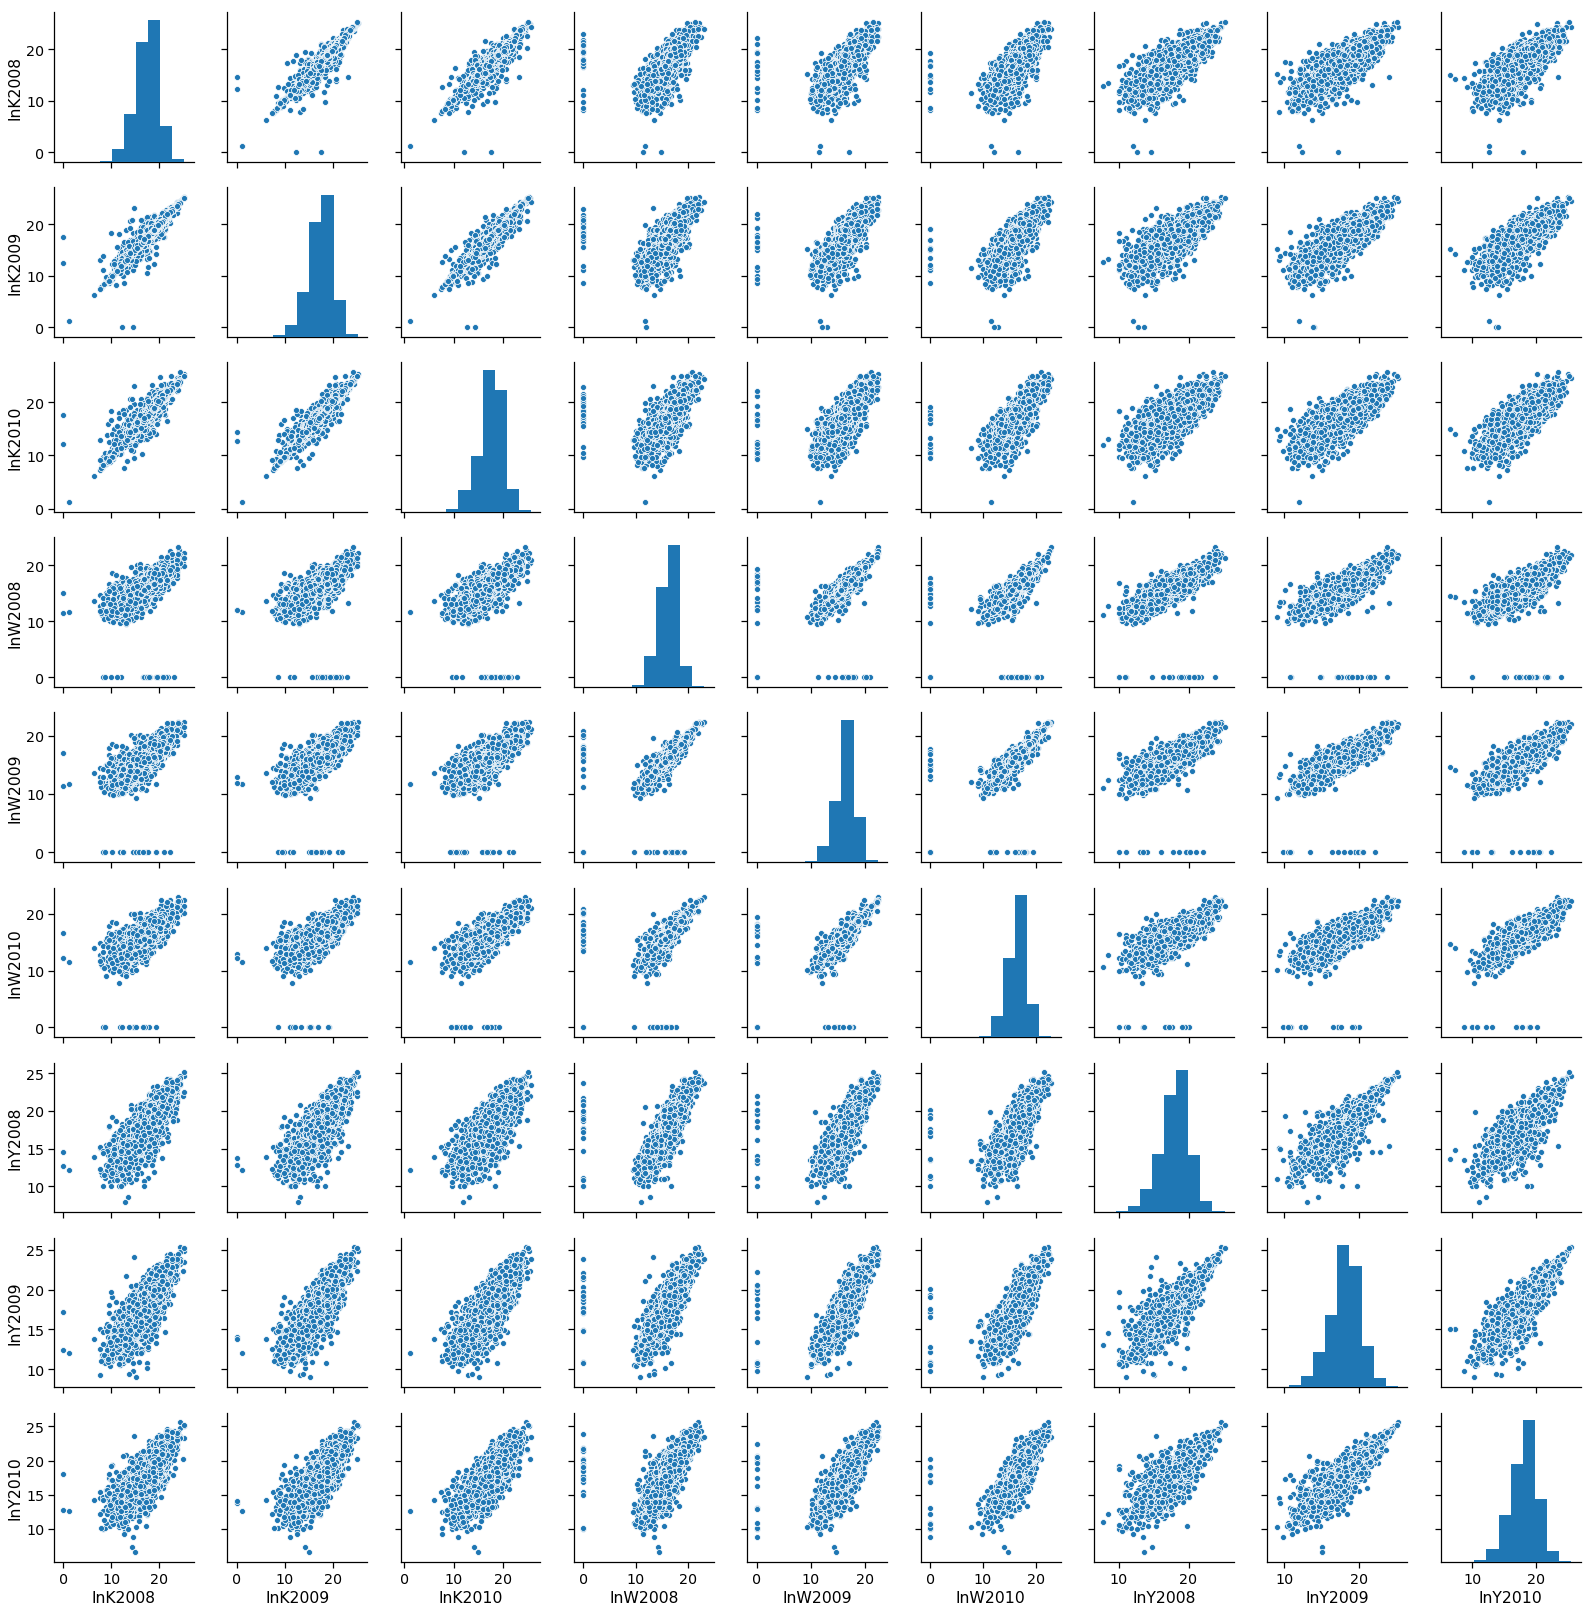

In [56]:
sns.pairplot(df)

### $M_{6}$ determinants distribution

90% of observations have $|\det(M_{6})| < 10^{-3}$

In [176]:
x = np.array(df[["lnK2008", "lnK2009", "lnK2010"]])
z = np.array(df[["lnW2008", "lnW2009", "lnW2010"]])
m6_determinants = pd.Series([np.linalg.det(m6(x[i], z[i])) for i in range(len(x))])
m6_determinants.quantile(np.linspace(0, 1, 11))

0.0    0.000000e+00
0.1    3.051750e-10
0.2    7.505914e-09
0.3    6.215981e-08
0.4    3.628565e-07
0.5    1.781079e-06
0.6    8.074993e-06
0.7    4.526030e-05
0.8    3.370447e-04
0.9    5.256727e-03
1.0    7.885518e+05
dtype: float64